In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
data                  = pd.read_csv("application_train.csv")
bureau                = pd.read_csv("bureau.csv")
bureau_balance        = pd.read_csv("bureau_balance.csv")
credit_card_balance   = pd.read_csv("credit_card_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")
pos_cash_balance      = pd.read_csv("POS_CASH_balance.csv")
previous_application  = pd.read_csv("previous_application.csv")

In [3]:
print ("application_train     :",data.shape)
print ("bureau                :",bureau.shape)
print ("bureau_balance        :",bureau_balance.shape)
print ("credit_card_balance   :",credit_card_balance.shape)
print ("installments_payments :",installments_payments.shape)
print ("pos_cash_balance      :",pos_cash_balance.shape)
print ("previous_application  :",previous_application.shape)

application_train     : (307511, 122)
bureau                : (1716428, 17)
bureau_balance        : (27299925, 3)
credit_card_balance   : (3840312, 23)
installments_payments : (13605401, 8)
pos_cash_balance      : (10001358, 8)
previous_application  : (1670214, 37)


application_train.csv: This is the main table with Terget variable.The training applicaton data comes with the TARGET indicating 0: the loan was repaid of 1: the loan was not repaid.

bureau.csv: All client’s previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).

bureau_balance.csv: Monthly balances of previous credits in Credit Bureau.

POS_CASH_balance.csv: Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.

credit_card_balance.csv: Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.

previous_application.csv: All previous applications for Home Credit loans of clients who have loans in our sample.

installments_payments.csv: Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.

In [4]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.shape

(307511, 122)

In [6]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
pd.set_option('display.max_rows', data.shape[0])
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


0    282686
1     24825
Name: TARGET, dtype: int64

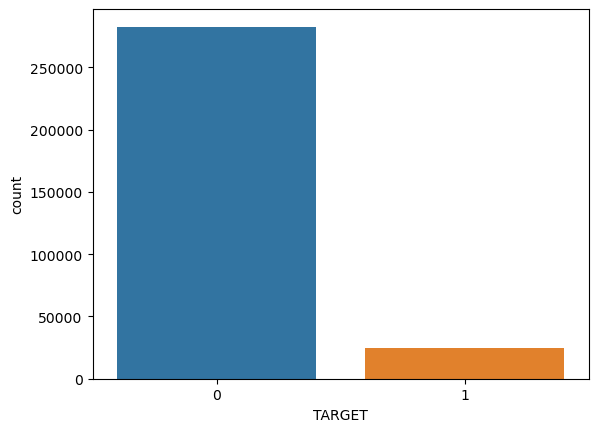

In [9]:
# 0 is paid, 1 is notpaid
sns.countplot(x = "TARGET", data= data)
data.loc[:, 'TARGET'].value_counts()

The data has target = 0 for people who can repay the loan and target = 1 for people who cannot repay the loan. The data is imbalanced because there is a high number of clients who repay the loan compared to clients who default.

In [10]:
pd.DataFrame(data.isnull().sum().sort_values(ascending = False))

,0
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
NONLIVINGAPARTMENTS_MEDI,213514
FONDKAPREMONT_MODE,210295
LIVINGAPARTMENTS_MODE,210199
LIVINGAPARTMENTS_AVG,210199
LIVINGAPARTMENTS_MEDI,210199


In [4]:
import dtale

In [5]:
dtale.show(data)

In [6]:
# Function to calculate missing values by column
def missing_values_table(data):
    # Total missing values
    mis_val = data.isnull().sum()
    
    # percentage of missing values
    mis_val_percent = 100 * data.isnull().sum() / len(data)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns= {0: 'Missing Values', 1 : '% of Total Values'})
    
    # sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
     # print some summary information
    print('Your selected dataframe has ' + str(data.shape[1]) +
         " columns.\n"
         "There are " + str(mis_val_table_ren_columns.shape[0]) +
         " columns that have missing values.")
    
    # return the dataframe with missing in information
    return mis_val_table_ren_columns


In [14]:
# missing values statistics
missing_values = missing_values_table(data)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [15]:
data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [16]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [7]:
def plot_bar_gen(feature, df = None, orientation_horizontal = True):
    
    if df is None:
        df = data
    else:
        df = df
    
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    sns.set_color_codes("bright")
    
    if orientation_horizontal == True:
        plt.figure(figsize=(10,6))
        plt.subplot(121)
        s1 = sns.barplot(y = feature, x="Number of contracts",data=df1)
        plt.subplot(122)
        s2 = sns.barplot(y = feature, x='TARGET', data=cat_perc)
        plt.xlabel('Fraction of loans defaulted', fontsize=12)
        plt.ylabel(feature, fontsize=12)
        
    else:
        plt.figure(figsize=(10,12))
        plt.subplot(211)
        s1 = sns.barplot(x = feature, y="Number of contracts",data=df1)
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
        plt.subplot(212)
        s2 = sns.barplot(x = feature, y='TARGET', data=cat_perc)
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
        plt.ylabel('Fraction of loans defaulted', fontsize=12)
        plt.xlabel(feature, fontsize=12)
    
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace = 0.8)
    plt.show();

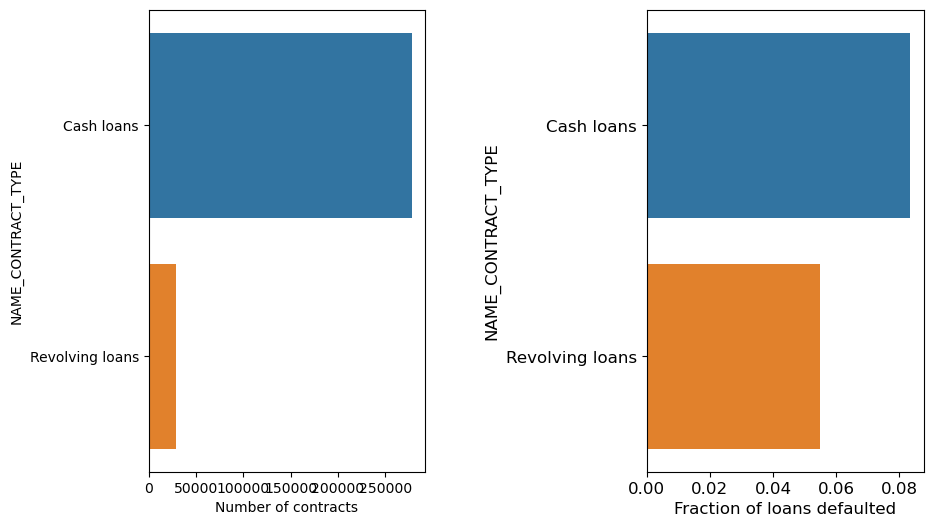

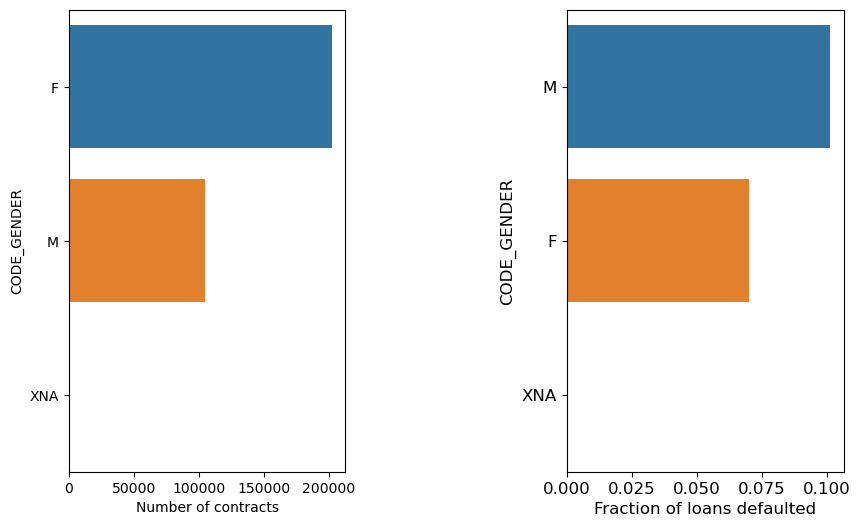

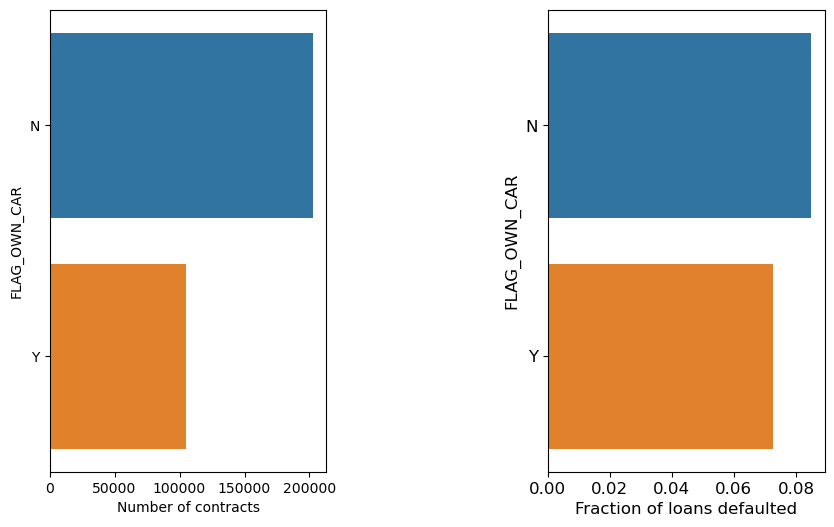

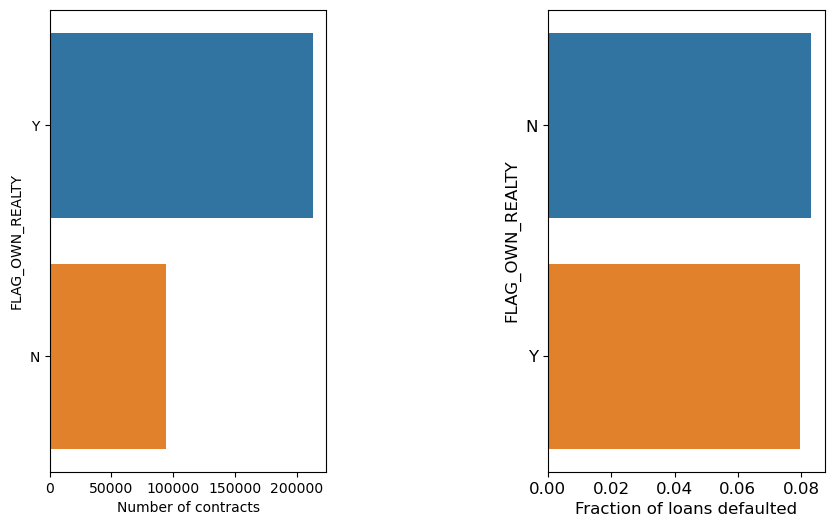

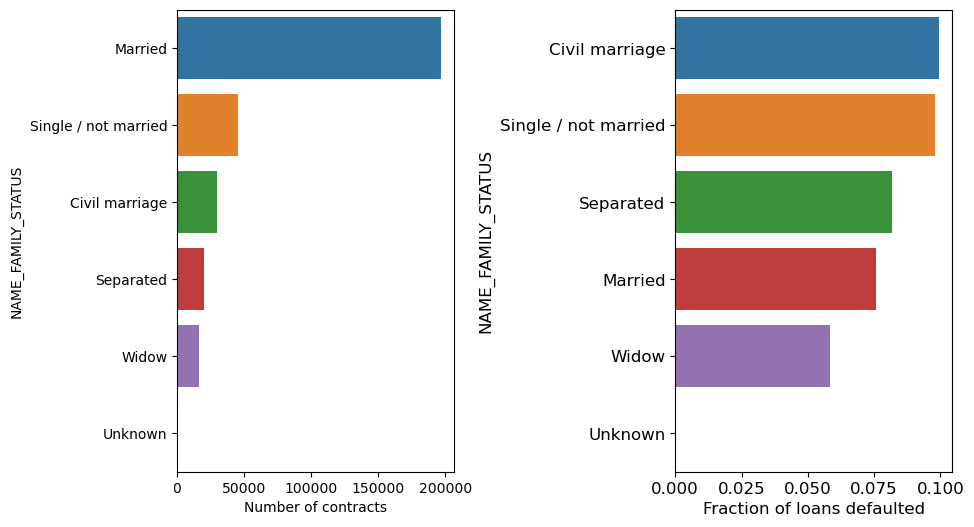

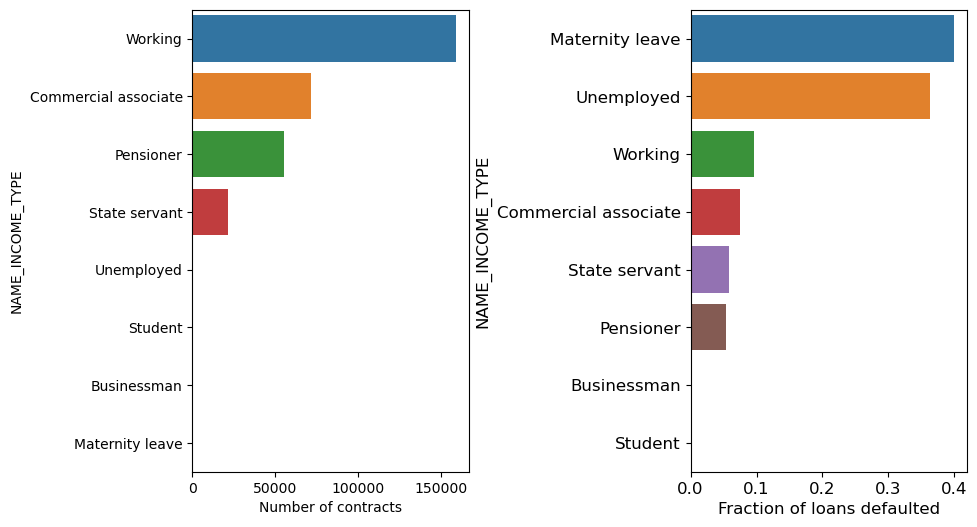

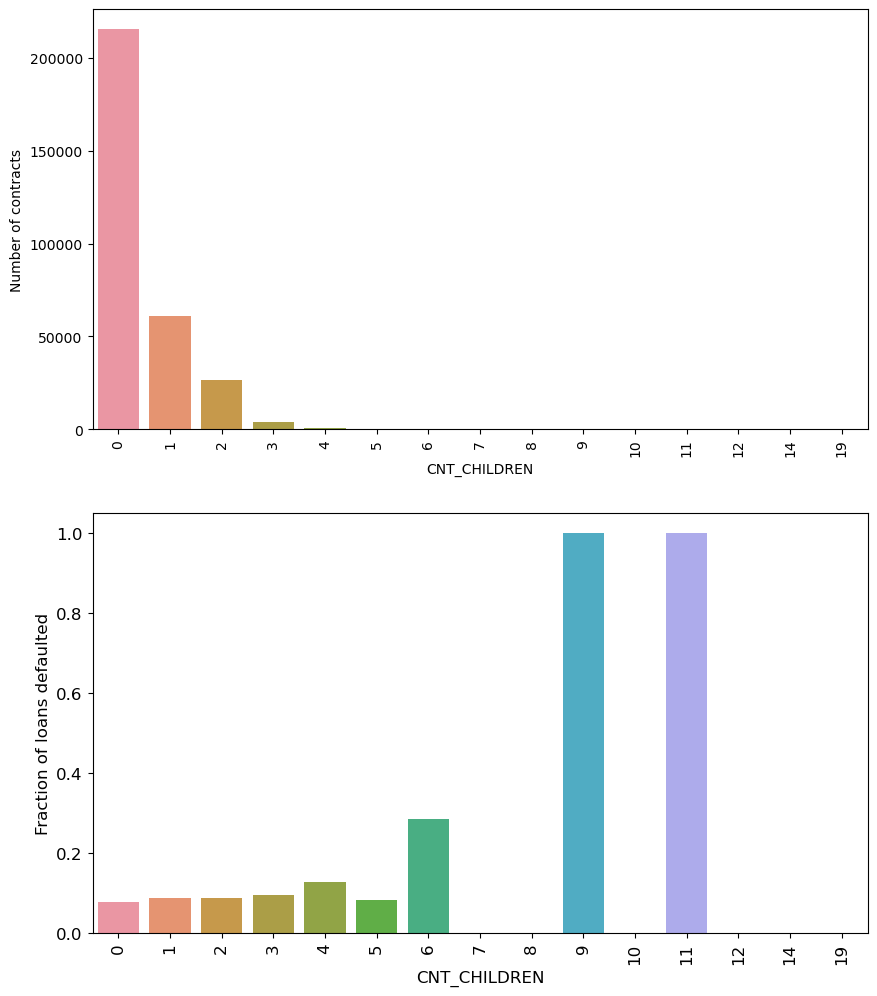

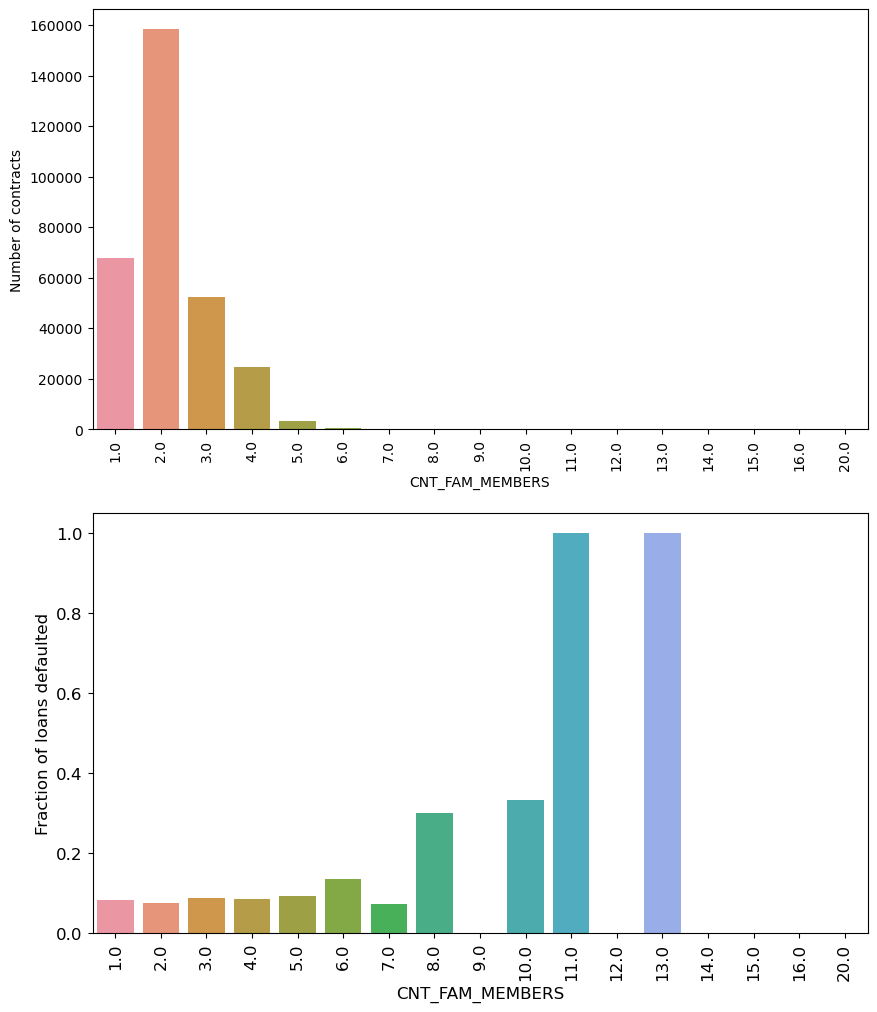

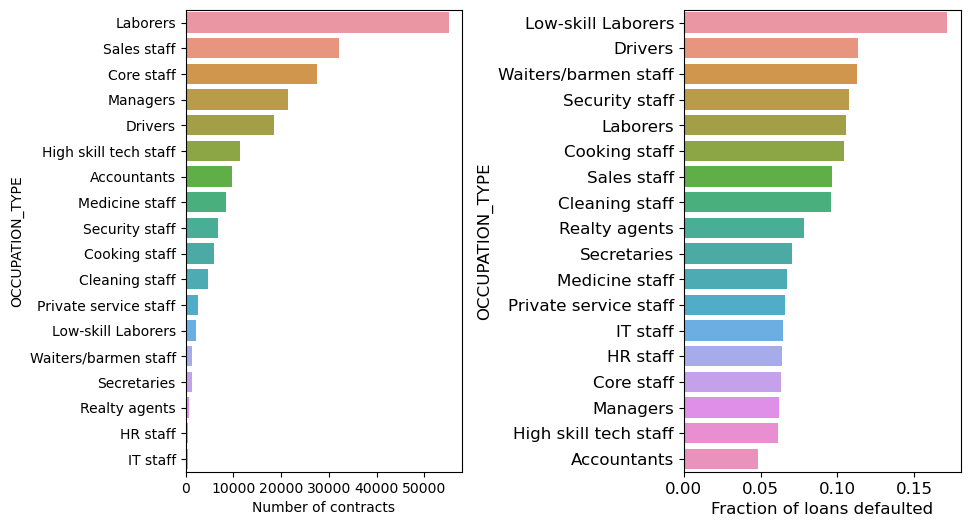

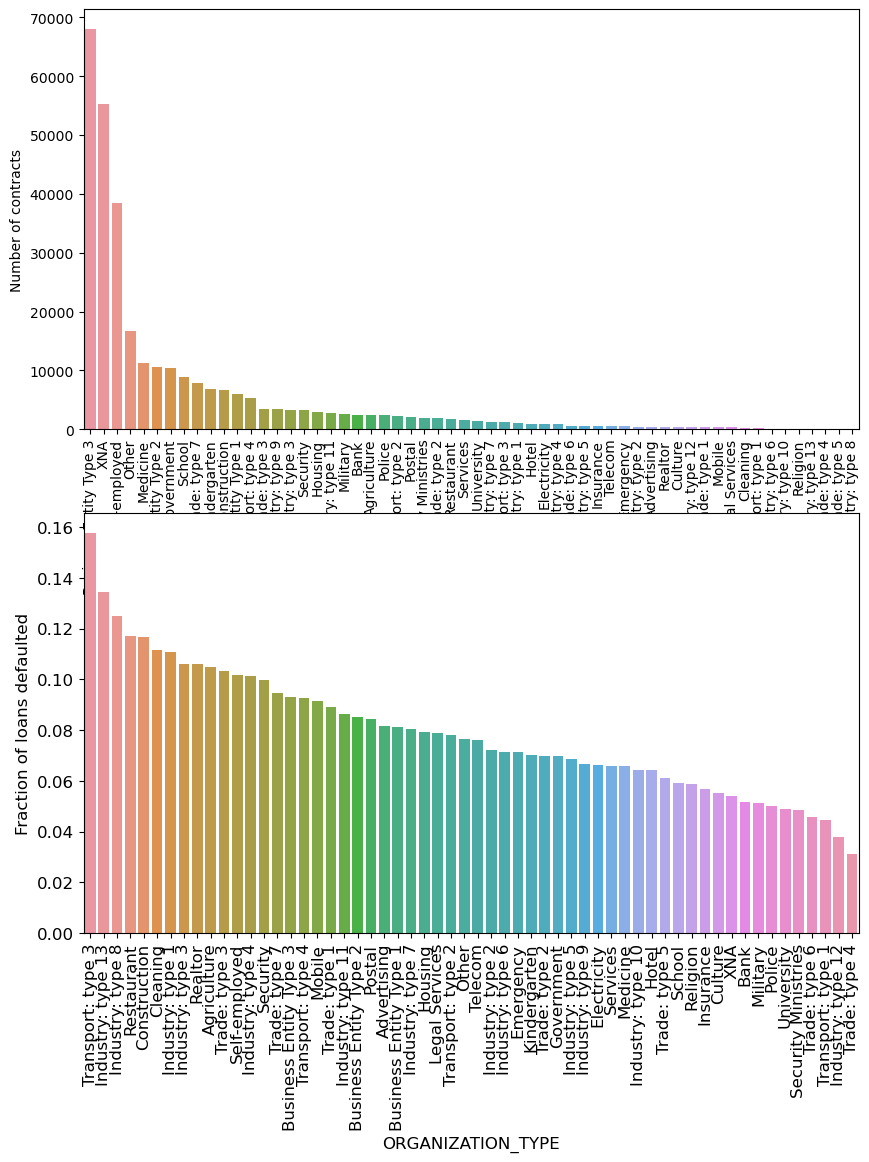

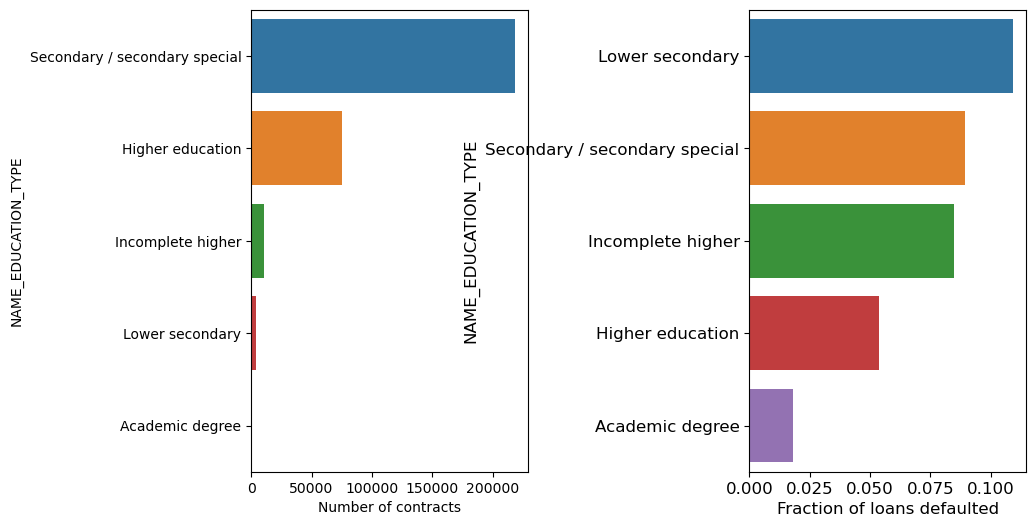

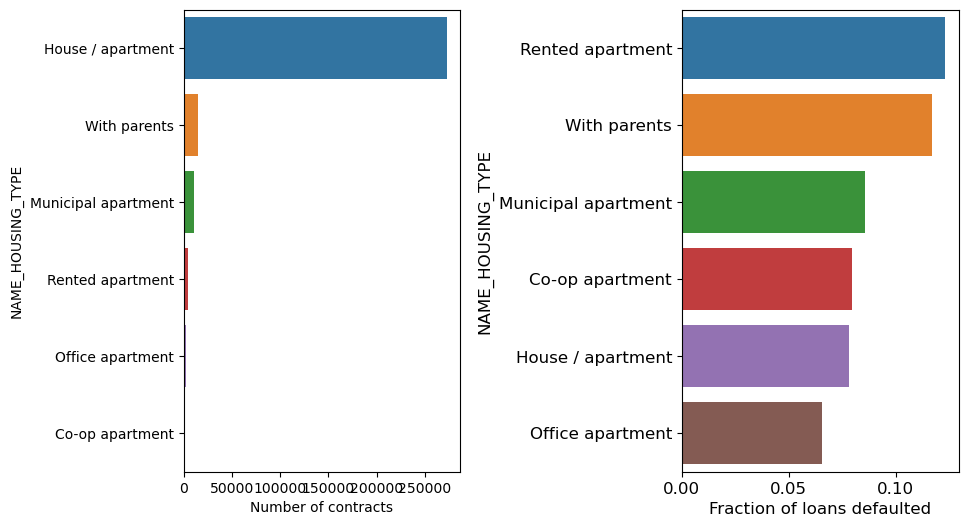

In [18]:
plot_bar_gen('NAME_CONTRACT_TYPE')
plot_bar_gen('CODE_GENDER')
plot_bar_gen('FLAG_OWN_CAR')
plot_bar_gen('FLAG_OWN_REALTY')
plot_bar_gen('NAME_FAMILY_STATUS')
plot_bar_gen('NAME_INCOME_TYPE')
plot_bar_gen('CNT_CHILDREN',None,False)
plot_bar_gen('CNT_FAM_MEMBERS',None,False)
plot_bar_gen('OCCUPATION_TYPE')
plot_bar_gen('ORGANIZATION_TYPE',None,False)
plot_bar_gen('NAME_EDUCATION_TYPE')
plot_bar_gen('NAME_HOUSING_TYPE')

### Insights of current application data:
1. Cash loans has highest count. Cash loans have more defaulters than revolving loan. (Revolving Loan- A revolving loan is considered a flexible financing tool due to its repayment and re-borrowing accommodations. Examples of revolving credit include credit cards)
2. Females has most counts for applying loan. Males are more defaulters compared to female applicants.
3. Applicants having car applied for more loans. defaulters are those who doesn't have car.
4. Married people applied for more loans. We can see in family applicants who are single or done civil marriage are high defaulters than widow and then married.
5. Working has the highest count. But Maternity leave and Unemployed are the ones whose loans are defaulter or not approved for loan.
6. Applicants with 0 children are more defaulters and members with 2 also are more defaulters and both have the most count.
7. In family members and children there is a uptrend and same with the defaulters i.e. as the family members increases defaulters increases.
8. Labourers applied for more loan. People with low skill labourers has highest defaulters, then drivers, labourers,cooking staff, Security staffs , waiters are followed and applicatns who are accountants, high skill tech, IT staff, HR staff are less dafaulters.
9. The applicants who have lower education like lower secondary have more defaulters than with academic degree which have less defaulters.
10. House/Apartment has highest counts. Applicants living in rented house and with parents having more defaulters and office appartments are more non defaulters.


In [8]:
# Plot distribution of one feature with or without paid/default shown separately

def plot_distribution_gen(feature,df=None,separate_target=False):
    if df is None:
        df = data
    else:
        df = df
        
    if separate_target == False:
        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.distplot(df[feature].dropna(),color='blue', kde=True,bins=100)
    else:
        t1 = df.loc[df['TARGET'] != 0]
        t0 = df.loc[df['TARGET'] == 0]
        
        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.set_style('whitegrid')
        #sns.kdeplot(t1[feature], bw=0.5,label="Loan defaulted (TARGET=1)")
        #sns.kdeplot(t0[feature], bw=0.5,label="Loan repaid (TARGET = 0)")
        
        sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label = 'target == 0')
        sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label = 'target == 1')
    
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.legend(loc="best", labels=['Loan repaid (TARGET=0)', 'Loan defaulted (TARGET=1)'])
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

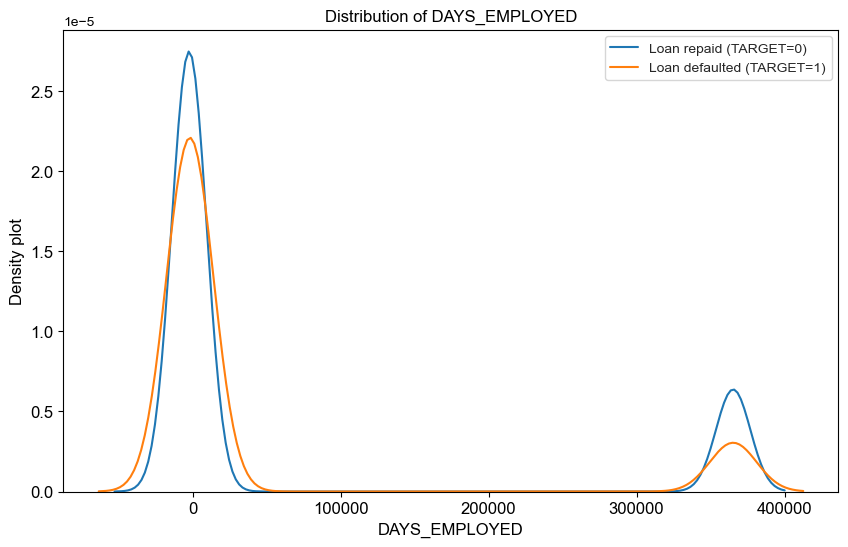

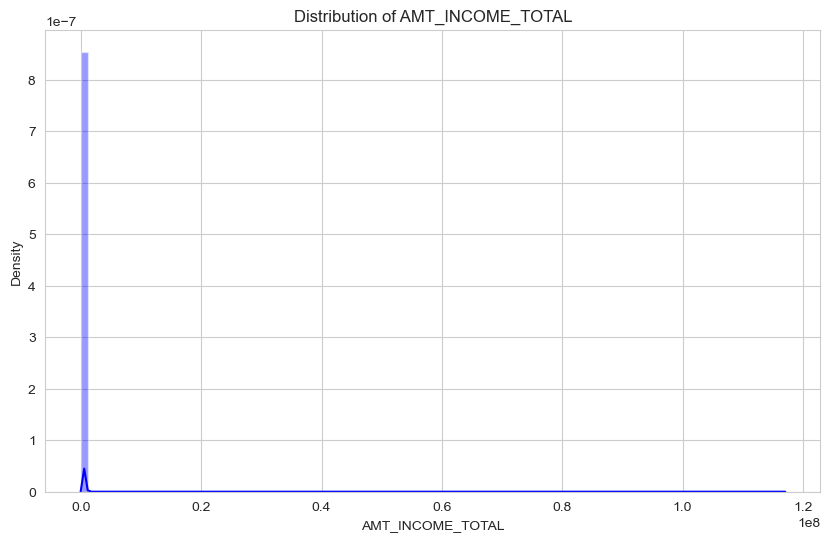

In [21]:
plot_distribution_gen('DAYS_EMPLOYED',None,True)
plot_distribution_gen('AMT_INCOME_TOTAL')

In [9]:
def create_income_band(df):
    df.loc[(df.AMT_INCOME_TOTAL < 30000),'INCOME_BAND'] = 1
    df.loc[(df.AMT_INCOME_TOTAL >= 30000)&(df.AMT_INCOME_TOTAL < 65000),'INCOME_BAND'] = 2
    df.loc[(df.AMT_INCOME_TOTAL >= 65000)&(df.AMT_INCOME_TOTAL < 95000),'INCOME_BAND'] = 3
    df.loc[(df.AMT_INCOME_TOTAL >= 95000)&(df.AMT_INCOME_TOTAL < 130000),'INCOME_BAND'] = 4
    df.loc[(df.AMT_INCOME_TOTAL >= 130000)&(df.AMT_INCOME_TOTAL < 160000),'INCOME_BAND'] = 5
    df.loc[(df.AMT_INCOME_TOTAL >= 160000)&(df.AMT_INCOME_TOTAL < 190000),'INCOME_BAND'] = 6
    df.loc[(df.AMT_INCOME_TOTAL >= 190000)&(df.AMT_INCOME_TOTAL < 220000),'INCOME_BAND'] = 7
    df.loc[(df.AMT_INCOME_TOTAL >= 220000)&(df.AMT_INCOME_TOTAL < 275000),'INCOME_BAND'] = 8
    df.loc[(df.AMT_INCOME_TOTAL >= 275000)&(df.AMT_INCOME_TOTAL < 325000),'INCOME_BAND'] = 9
    df.loc[(df.AMT_INCOME_TOTAL >= 325000),'INCOME_BAND'] = 10
    return df

Text(0.5, 1.0, 'Income data for people repaying loans')

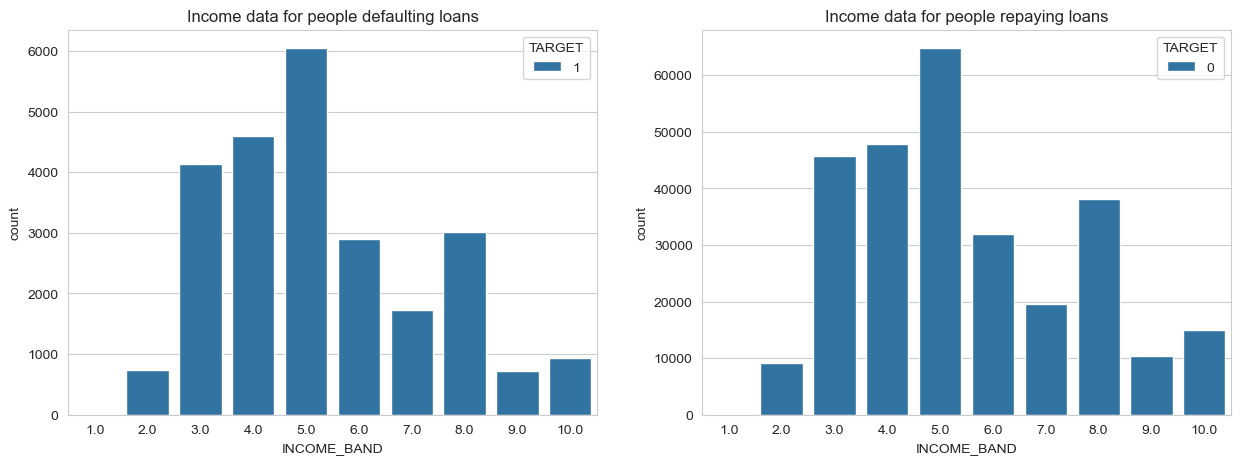

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data=data[data.TARGET==1],x='INCOME_BAND',hue='TARGET').set_title('Income data for people defaulting loans')
plt.subplot(122)
sns.countplot(data=data[data.TARGET==0],x='INCOME_BAND',hue='TARGET').set_title('Income data for people repaying loans')

In [10]:
def replace_day_outliers(df):
    """Replace 365243 with np.nan in any columns with DAYS"""
    for col in df.columns:
        if "DAYS" in col:
            df[col] = df[col].replace({365243: np.nan})

    return df

In [11]:
# Replace all the day outliers
data_new = replace_day_outliers(data)
bureau_new = replace_day_outliers(bureau )              
bureau_balance_new  = replace_day_outliers(bureau_balance)      
credit_card_balance_new  = replace_day_outliers(credit_card_balance) 
installments_payments_new = replace_day_outliers(installments_payments)
pos_cash_balance_new = replace_day_outliers(pos_cash_balance )   
previous_application_new  = replace_day_outliers(previous_application)

In [12]:
def remove_missing_col(df):
    miss_data = pd.DataFrame((df.isnull().sum())*100/df.shape[0])
    miss_data_col=miss_data[miss_data[0]>60].index
    data_new  = df[[i for i in df.columns if i not in miss_data_col]]
    return data_new

In [13]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with median of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [14]:
data_train = pd.get_dummies(data_new)

In [30]:
data_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 247 columns):
 #    Column                                             Non-Null Count   Dtype  
---   ------                                             --------------   -----  
 0    SK_ID_CURR                                         307511 non-null  int64  
 1    TARGET                                             307511 non-null  int64  
 2    CNT_CHILDREN                                       307511 non-null  int64  
 3    AMT_INCOME_TOTAL                                   307511 non-null  float64
 4    AMT_CREDIT                                         307511 non-null  float64
 5    AMT_ANNUITY                                        307499 non-null  float64
 6    AMT_GOODS_PRICE                                    307233 non-null  float64
 7    REGION_POPULATION_RELATIVE                         307511 non-null  float64
 8    DAYS_BIRTH                                         307511 non-

In [15]:
# Drop the SK_ID from the training data
from sklearn.preprocessing import MinMaxScaler
skid_temp = data_new['SK_ID_CURR']
train = data_train.drop(columns = ['SK_ID_CURR'])
    
# Feature names
features = list(train.columns)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Median imputation of missing values
train = DataFrameImputer().fit_transform(train)

## Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
data_train = pd.DataFrame(data=train, columns=features)

print('Data shape: ', data_train.shape)

Data shape:  (307511, 245)


## Train-Test split

In [16]:
X= data_train.drop('TARGET',axis=1)
y= data_train['TARGET']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.25, stratify=y, random_state=42)

In [18]:
base_models=['Logistic Regression','Random Forest Classifier','Gradient Boosting Classifier','Xgboost Classifier','Naive Bayes Classifier','LGBM Classifier','CatBoost Classifier']
f1_train=[]
auc_train=[]
f1_test=[]
auc_test=[]

# Model building

## 1.LogisticRegression

In [19]:
from sklearn.metrics import classification_report

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
LR=LogisticRegression()
LR.fit(X_train,y_train)
ytrain_pred=LR.predict(X_train)
ytrain_proba=LR.predict_proba(X_train)[:, 1]
ytest_pred=LR.predict(X_test)
ytest_proba=LR.predict_proba(X_test)[:, 1]


## Evaluation 

In [21]:
print("f1_score of train data considering both Classes: ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data for Positive Class: ", roc_auc_score(y_train,ytrain_proba))
print("f1_score of test data considering both Classes: ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data for Positive Class: ", roc_auc_score(y_test,ytest_proba))

f1_score of train data considering both Classes:  0.4895829231731361
ROC AUC of train data for Positive Class:  0.745925501790915
f1_score of test data considering both Classes:  0.489523749462671
ROC AUC of test data for Positive Class:  0.746712319980569


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     70672
         1.0       0.50      0.01      0.02      6206

    accuracy                           0.92     76878
   macro avg       0.71      0.50      0.49     76878
weighted avg       0.89      0.92      0.88     76878



In [23]:
recall_LR=recall_score(y_test,ytest_pred)
print("The rercall score for LogisticRegression is: ",recall_LR)

The rercall score for LogisticRegression is:  0.010796003867225266


In [24]:
accuracy=accuracy_score(y_test,ytest_pred)
accuracy

0.91928770259372

In [25]:
def plot_roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
    plt.legend()#area describing the elements of the graph
    plt.show()#to show graph without location

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, ytest_proba)

In [ ]:
roc_df= pd.DataFrame(fpr,tpr,thresholds), columns=['FPR','TPR','Thres_v']
roc_df

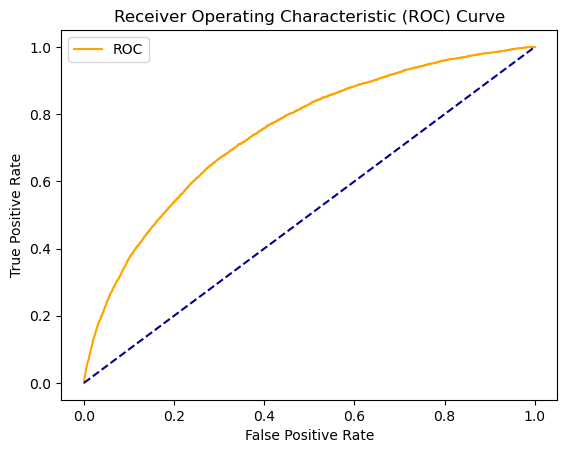

In [27]:
plot_roc_curve(fpr, tpr)

## 2.RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
ytrain_pred=rf.predict(X_train)
ytrain_proba=rf.predict_proba(X_train)[:, 1]
ytest_pred=rf.predict(X_test)
ytest_proba=rf.predict_proba(X_test)[:, 1]

## Evaluation

In [29]:
print("f1_score of train data considering both Classes: ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data for Positive Class: ", roc_auc_score(y_train,ytrain_proba))
print("f1_score of test data considering both Classes: ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data for Positive Class: ", roc_auc_score(y_test,ytest_proba))

f1_score of train data considering both Classes:  0.9997954414812786
ROC AUC of train data for Positive Class:  1.0
f1_score of test data considering both Classes:  0.4801118096559418
ROC AUC of test data for Positive Class:  0.7096540571591858


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     70672
         1.0       0.78      0.00      0.00      6206

    accuracy                           0.92     76878
   macro avg       0.85      0.50      0.48     76878
weighted avg       0.91      0.92      0.88     76878



In [31]:
recall_rf=recall_score(y_test,ytest_pred)
print("The rercall score for RandomForest is: ",recall_rf)

The rercall score for RandomForest is:  0.0011279407025459234


In [32]:
accuracy=accuracy_score(y_test,ytest_pred)
accuracy

0.919339733083587

In [33]:
def plot_roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
    plt.legend()#area describing the elements of the graph
    plt.show()#to show graph without location

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, ytest_proba)

In [ ]:
roc_df= pd.DataFrame(fpr,tpr,thresholds), columns=['FPR','TPR','Thres_v']
roc_df

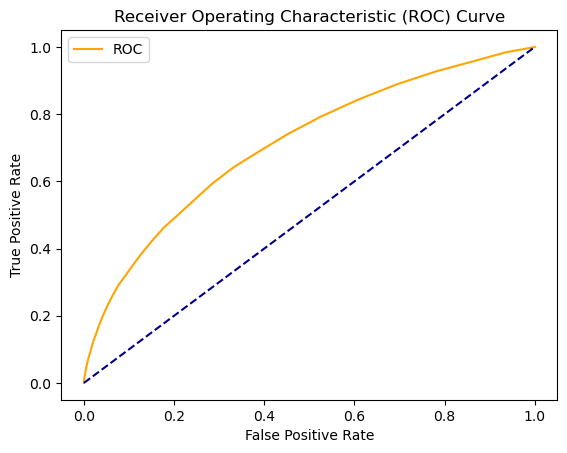

In [34]:
plot_roc_curve(fpr, tpr)

## 3.Gradient Boosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
ytrain_pred=gbc.predict(X_train)
ytrain_proba=gbc.predict_proba(X_train)[:, 1]
ytest_pred=gbc.predict(X_test)
ytest_proba=gbc.predict_proba(X_test)[:, 1]

## Evaluation

In [36]:
print("f1_score of train data considering both Classes: ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data for Positive Class: ", roc_auc_score(y_train,ytrain_proba))
print("f1_score of test data considering both Classes: ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data for Positive Class: ", roc_auc_score(y_test,ytest_proba))

f1_score of train data considering both Classes:  0.4924530442337063
ROC AUC of train data for Positive Class:  0.7589952738321555
f1_score of test data considering both Classes:  0.49093193457505435
ROC AUC of test data for Positive Class:  0.7538253137268622


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     70672
         1.0       0.65      0.01      0.02      6206

    accuracy                           0.92     76878
   macro avg       0.78      0.51      0.49     76878
weighted avg       0.90      0.92      0.88     76878



In [38]:
recall_gbc=recall_score(y_test,ytest_pred)
print("The rercall score for GradientBoosting is: ",recall_gbc)

The rercall score for GradientBoosting is:  0.012085078955849178


In [39]:
accuracy=accuracy_score(y_test,ytest_pred)
accuracy

0.9197169541351232

In [40]:
def plot_roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
    plt.legend()#area describing the elements of the graph
    plt.show()#to show graph without location

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, ytest_proba)

In [ ]:
roc_df= pd.DataFrame(fpr,tpr,thresholds), columns=['FPR','TPR','Thres_v']
roc_df

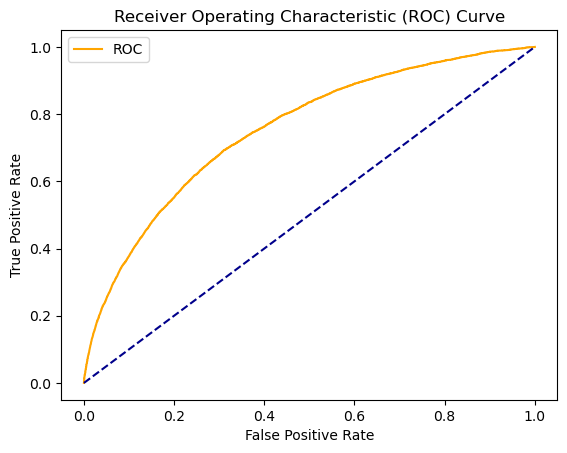

In [41]:

plot_roc_curve(fpr, tpr)

## 4.Xgboost Classifier

In [79]:
from xgboost import XGBClassifier
xgc=XGBClassifier()
xgc.fit(X_train,y_train)
ytrain_pred=xgc.predict(X_train)
ytrain_proba=xgc.predict_proba(X_train)[:, 1]
ytest_pred=xgc.predict(X_test)
ytest_proba=xgc.predict_proba(X_test)[:, 1]

## Evaluation

In [43]:
print("f1_score of train data considering both Classes: ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data for Positive Class: ", roc_auc_score(y_train,ytrain_proba))
print("f1_score of test data considering both Classes: ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data for Positive Class: ", roc_auc_score(y_test,ytest_proba))

f1_score of train data considering both Classes:  0.5463025252665813
ROC AUC of train data for Positive Class:  0.851848486345977
f1_score of test data considering both Classes:  0.5109855794709938
ROC AUC of test data for Positive Class:  0.7510487449484534


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     70672
         1.0       0.51      0.03      0.06      6206

    accuracy                           0.92     76878
   macro avg       0.72      0.52      0.51     76878
weighted avg       0.89      0.92      0.89     76878



In [80]:
recall_gbc=recall_score(y_test,ytest_pred)
print("The rercall score for XGB is: ",recall_gbc)

The rercall score for XGB is:  0.034160489848533676


In [46]:
accuracy=accuracy_score(y_test,ytest_pred)
accuracy

0.9194307864408543

In [47]:
def plot_roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
    plt.legend()#area describing the elements of the graph
    plt.show()#to show graph without location

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, ytest_proba)

In [ ]:
roc_df= pd.DataFrame(fpr,tpr,thresholds), columns=['FPR','TPR','Thres_v']
roc_df

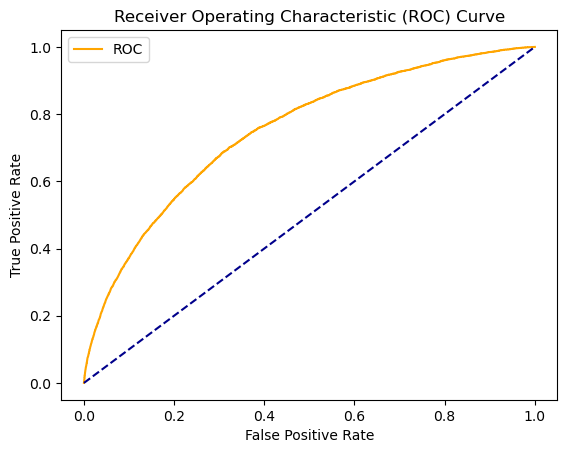

In [48]:

plot_roc_curve(fpr, tpr)

## 5.DecisionTreeClassifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
ytrain_pred=DT.predict(X_train)
ytrain_proba=DT.predict_proba(X_train)[:, 1]
ytest_pred=DT.predict(X_test)
ytest_proba=DT.predict_proba(X_test)[:, 1]

## Evaluation

In [50]:
print("f1_score of train data considering both Classes: ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data for Positive Class: ", roc_auc_score(y_train,ytrain_proba))
print("f1_score of test data considering both Classes: ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data for Positive Class: ", roc_auc_score(y_test,ytest_proba))

f1_score of train data considering both Classes:  1.0
ROC AUC of train data for Positive Class:  1.0
f1_score of test data considering both Classes:  0.5418096552149684
ROC AUC of test data for Positive Class:  0.5455056279020697


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     70672
         1.0       0.15      0.18      0.16      6206

    accuracy                           0.85     76878
   macro avg       0.54      0.55      0.54     76878
weighted avg       0.86      0.85      0.86     76878



In [52]:
recall_DT=recall_score(y_test,ytest_pred)
print("The rercall score for DecisionTree is: ",recall_DT)

The rercall score for DecisionTree is:  0.17869803416048985


In [53]:
accuracy=accuracy_score(y_test,ytest_pred)
accuracy

0.8530919118603502

In [54]:
def plot_roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
    plt.legend()#area describing the elements of the graph
    plt.show()#to show graph without location

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, ytest_proba)

In [ ]:
roc_df= pd.DataFrame(fpr,tpr,thresholds), columns=['FPR','TPR','Thres_v']
roc_df

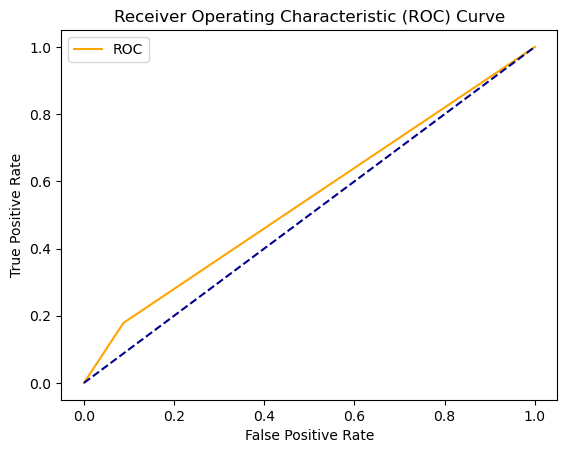

In [55]:

plot_roc_curve(fpr, tpr)

## 6.Naive bayes

In [56]:
from sklearn.naive_bayes import BernoulliNB    
nb=BernoulliNB(alpha=0.01)
nb.fit(X_train,y_train)
ytrain_pred=nb.predict(X_train)
ytrain_proba=nb.predict_proba(X_train)[:, 1]
ytest_pred=nb.predict(X_test)
ytest_proba=nb.predict_proba(X_test)[:, 1]

## Evaluation

In [57]:
print("f1_score of train data considering both Classes: ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data for Positive Class: ", roc_auc_score(y_train,ytrain_proba))
print("f1_score of test data considering both Classes: ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data for Positive Class: ", roc_auc_score(y_test,ytest_proba))

f1_score of train data considering both Classes:  0.5474480687735416
ROC AUC of train data for Positive Class:  0.6318397145715833
f1_score of test data considering both Classes:  0.547265798520495
ROC AUC of test data for Positive Class:  0.6345012640403428


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     70672
         1.0       0.17      0.17      0.17      6206

    accuracy                           0.87     76878
   macro avg       0.55      0.55      0.55     76878
weighted avg       0.87      0.87      0.87     76878



In [59]:
recall_nb=recall_score(y_test,ytest_pred)
print("The rercall score for naive_bayes is: ",recall_nb)

The rercall score for naive_bayes is:  0.16725749274895263


In [60]:
accuracy=accuracy_score(y_test,ytest_pred)
accuracy

0.8658003590103801

In [61]:
def plot_roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
    plt.legend()#area describing the elements of the graph
    plt.show()#to show graph without location

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, ytest_proba)

In [ ]:
roc_df= pd.DataFrame(fpr,tpr,thresholds), columns=['FPR','TPR','Thres_v']
roc_df

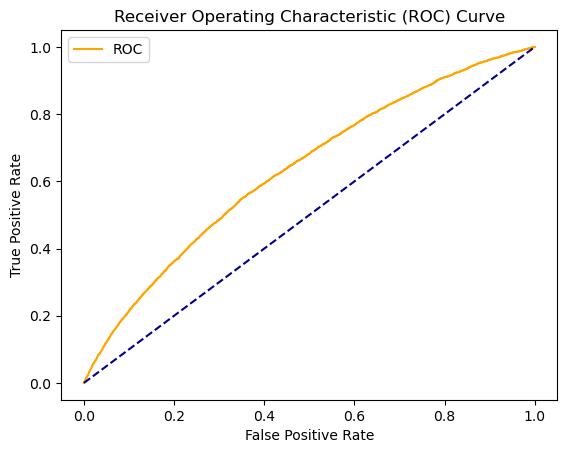

In [62]:

plot_roc_curve(fpr, tpr)

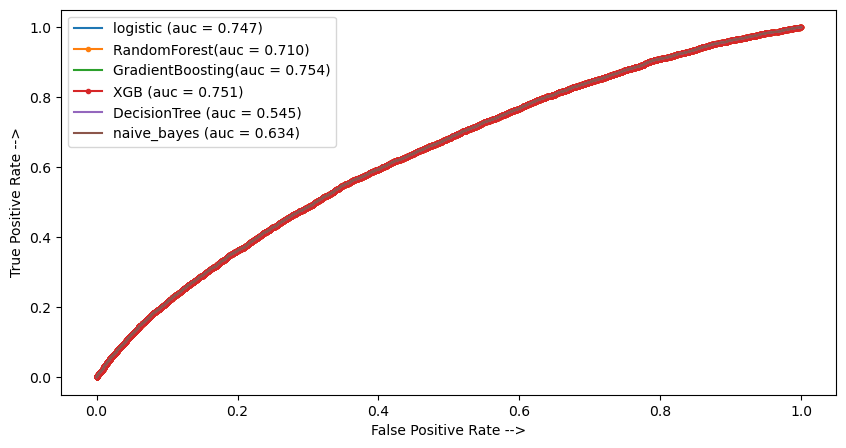

In [74]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, ytest_proba)
auc_logistic = auc(logistic_fpr, logistic_tpr)

RandomForest_fpr, RandomForest_tpr, threshold = roc_curve(y_test,ytest_proba)
auc_RandomForest = auc(RandomForest_fpr, RandomForest_tpr)

GradientBoosting_fpr, GradientBoosting_tpr, threshold = roc_curve(y_test, ytest_proba)
auc_GradientBoosting = auc(GradientBoosting_fpr, GradientBoosting_tpr)

XGB_fpr, XGB_tpr, threshold = roc_curve(y_test, ytest_proba)
auc_XGB = auc(XGB_fpr, XGB_tpr)

DecisionTree_fpr, DecisionTree_tpr, threshold = roc_curve(y_test, ytest_proba)
auc_DecisionTree = auc(DecisionTree_fpr, DecisionTree_tpr)

naive_bayes_fpr, naive_bayes_tpr, threshold = roc_curve(y_test, ytest_proba)
auc_naive_bayes = auc(naive_bayes_fpr, naive_bayes_tpr)


plt.figure(figsize=(10, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label='logistic (auc = %0.3f)' % 0.7467)
plt.plot(RandomForest_fpr, RandomForest_tpr, marker='.', label='RandomForest(auc = %0.3f)' % 0.7096)
plt.plot(GradientBoosting_fpr, GradientBoosting_tpr, linestyle='-', label='GradientBoosting(auc = %0.3f)' % 0.7538)
plt.plot(XGB_fpr, XGB_tpr, marker='.', label='XGB (auc = %0.3f)' % 0.7510)
plt.plot(DecisionTree_fpr, DecisionTree_tpr, linestyle='-', label='DecisionTree (auc = %0.3f)' %  0.5455)
plt.plot(naive_bayes_fpr, naive_bayes_tpr, linestyle='-', label='naive_bayes (auc = %0.3f)' %  0.6345)



plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

## Threshold Impact

In [76]:
# Defining the threshold limit
def predict_threshold (model,X_test,thresholds):     
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)


In [77]:
# Confusion Matrices for different Thresholds
for thr in np.arange(0,1.0,0.1):# it will create matrix /array from range 0 to 1 with step 0.2
    y_predict = predict_threshold(gbc,X_test,thr)   #it will check result  for  each threshold from 0 to 0.2, Logistic regression is our best model
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[    0 70672]
 [    0  6206]]
Threshold : 0.1
[[55330 15342]
 [ 2613  3593]]
Threshold : 0.2
[[66983  3689]
 [ 4602  1604]]
Threshold : 0.30000000000000004
[[69721   951]
 [ 5548   658]]
Threshold : 0.4
[[70448   224]
 [ 5989   217]]
Threshold : 0.5
[[70631    41]
 [ 6131    75]]
Threshold : 0.6000000000000001
[[70667     5]
 [ 6186    20]]
Threshold : 0.7000000000000001
[[70672     0]
 [ 6204     2]]
Threshold : 0.8
[[70672     0]
 [ 6206     0]]
Threshold : 0.9
[[70672     0]
 [ 6206     0]]


## Conclusion:

GradientBoosting: AUC score is 75.4%, Accuracy is 91.97%
XGB: AUC score is 75%, Accuracy is 91.94%
RandomForest: AUC score is 71%, Accuracy is 91.93%  
LogisticRegression: AUC score is 74.7%, Accuracy is 91.92%



•The highest Recall & Accuracy value was obtained for GradientBoosting, which is then followed by XGBoost Classifier,RandomForest,LogisticRegression Model.

•The highest ROC-AUC was observed for GradientBoosting Classifier, followed by,RandomForest, XGBoost Classifier,RandomForest,LogisticRegression Model.

